In [ ]:
pip install -U spacy

In [ ]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 5.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!pip install wordcloud

In [148]:
pip install nltk

In [ ]:
import numpy as np
import pandas as pd
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [ ]:
nlp=spacy.load('en_core_web_md')

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving blogs_categories.csv to blogs_categories.csv


In [ ]:
blog=pd.read_csv('blogs_categories.csv',on_bad_lines = "skip")

In [ ]:
blog

Unnamed: 0                                               Data  \
0               0  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...   
1               1  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...   
2               2  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
3               3  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...   
4               4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...   
...           ...                                                ...   
19992       19992  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...   
19993       19993  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...   
19994       19994  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....   
19995       19995  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....   
19996       19996  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...   

                   Labels  
0             alt.atheism  
1             alt.atheism  
2             alt.atheism  
3             alt.atheism  
4             alt.atheism  
...                   ...  
19992  talk.religion.misc  
19993  talk.religion.misc  
19994  talk.religion.misc  
19995  talk.religion.misc  
19996  talk.religion.misc  

[19997 rows x 3 columns]

In [ ]:
blog.drop(['Unnamed: 0','Labels'],axis=1,inplace=True)

In [ ]:
blog

Data
0      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...
1      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...
2      Newsgroups: alt.atheism\nPath: cantaloupe.srv....
3      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...
4      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...
...                                                  ...
19992  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...
19993  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...
19994  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....
19995  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....
19996  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...

[19997 rows x 1 columns]

In [ ]:
blog = [Data.strip() for Data in blog.Data] # remove both the leading and the trailing spaces
blog = [Data for Data in blog if Data] # removes empty strings, because they are considered in Python as False
blog

['Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49960 alt.atheism.moderated:713 news.answers:7054 alt.answers:126\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew\nFrom: mathew <mathew@mantis.co.uk>\nNewsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers\nSubject: Alt.Atheism FAQ: Atheist Resources\nSummary: Books, addresses, music -- anything related to atheism\nKeywords: FAQ, atheism, books, music, fiction, addresses, contacts\nMessage-ID: <19930329115719@mantis.co.uk>\nDate: Mon, 29 Mar 1993 11:57:19 GMT\nExpires: Thu, 29 Apr 1993 11:57:19 GMT\nFollowup-To: alt.atheism\nDistribution: world\nOrganization: Mantis Consultants, Cambridge. UK.\nApproved: news-answers-request@mit.edu\nSupersedes: <19930301143317@mantis.co.uk>\nLines: 290\n\nArchive-name: atheism/resources\nAlt-atheism-archive-name: resources\nLast-

In [ ]:
# Joining the list into one string/text
text = ' '.join(blog)
text

In [ ]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))
no_punc_text

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokenize = word_tokenize(no_punc_text)
print(text_tokenize)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
len(text_tokenize)

5844802

In [ ]:
#Normalize the data
lower_words = [x.lower() for x in text_tokenize]
print(lower_words[0:300])

['xref', 'cantaloupesrvcscmuedu', 'altatheism49960', 'altatheismmoderated713', 'newsanswers7054', 'altanswers126', 'path', 'cantaloupesrvcscmueducrabapplesrvcscmuedubb3andrewcmuedunewsseicmueducisohiostateedumagnusacsohiostateeduusenetinscwrueduagatespoolmueduuunetpipexibmpcugmantismathew', 'from', 'mathew', 'mathewmantiscouk', 'newsgroups', 'altatheismaltatheismmoderatednewsanswersaltanswers', 'subject', 'altatheism', 'faq', 'atheist', 'resources', 'summary', 'books', 'addresses', 'music', 'anything', 'related', 'to', 'atheism', 'keywords', 'faq', 'atheism', 'books', 'music', 'fiction', 'addresses', 'contacts', 'messageid', '19930329115719mantiscouk', 'date', 'mon', '29', 'mar', '1993', '115719', 'gmt', 'expires', 'thu', '29', 'apr', '1993', '115719', 'gmt', 'followupto', 'altatheism', 'distribution', 'world', 'organization', 'mantis', 'consultants', 'cambridge', 'uk', 'approved', 'newsanswersrequestmitedu', 'supersedes', '19930301143317mantiscouk', 'lines', '290', 'archivename', 'ath

In [ ]:
#Remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
my_stop_words = stopwords.words('english')
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
my_stop_words.append('the')
no_stop_tokens = [word for word in lower_words if not word in my_stop_words]
print(no_stop_tokens[0:400])

['xref', 'cantaloupesrvcscmuedu', 'altatheism49960', 'altatheismmoderated713', 'newsanswers7054', 'altanswers126', 'path', 'cantaloupesrvcscmueducrabapplesrvcscmuedubb3andrewcmuedunewsseicmueducisohiostateedumagnusacsohiostateeduusenetinscwrueduagatespoolmueduuunetpipexibmpcugmantismathew', 'mathew', 'mathewmantiscouk', 'newsgroups', 'altatheismaltatheismmoderatednewsanswersaltanswers', 'subject', 'altatheism', 'faq', 'atheist', 'resources', 'summary', 'books', 'addresses', 'music', 'anything', 'related', 'atheism', 'keywords', 'faq', 'atheism', 'books', 'music', 'fiction', 'addresses', 'contacts', 'messageid', '19930329115719mantiscouk', 'date', 'mon', '29', 'mar', '1993', '115719', 'gmt', 'expires', 'thu', '29', 'apr', '1993', '115719', 'gmt', 'followupto', 'altatheism', 'distribution', 'world', 'organization', 'mantis', 'consultants', 'cambridge', 'uk', 'approved', 'newsanswersrequestmitedu', 'supersedes', '19930301143317mantiscouk', 'lines', '290', 'archivename', 'atheismresources'

In [ ]:
len(no_stop_tokens)

3596787

In [ ]:
len(lower_words)

5844802

In [ ]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [ ]:
stemmed_tokens = [ps.stem(word) for word in my_stop_words]
print(stemmed_tokens[0:400])

['i', 'me', 'my', 'myself', 'we', 'our', 'our', 'ourselv', 'you', "you'r", "you'v", "you'll", "you'd", 'your', 'your', 'yourself', 'yourselv', 'he', 'him', 'hi', 'himself', 'she', "she'", 'her', 'her', 'herself', 'it', "it'", 'it', 'itself', 'they', 'them', 'their', 'their', 'themselv', 'what', 'which', 'who', 'whom', 'thi', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'wa', 'were', 'be', 'been', 'be', 'have', 'ha', 'had', 'have', 'do', 'doe', 'did', 'do', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'becaus', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'dure', 'befor', 'after', 'abov', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'onc', 'here', 'there', 'when', 'where', 'whi', 'how', 'all', 'ani', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'onli', 'own', 'same', 'so', 'than', 'too', 'veri', 's', 't', 'can', 'wi

In [ ]:
for w in no_stop_tokens:
    print(w, " : ", ps.stem(w))

Streaming output truncated to the last 5000 lines.
franklin  :  franklin
deist  :  deist
found  :  found
amazing  :  amaz
benjamin  :  benjamin
franklin  :  franklin
missed  :  miss
whole  :  whole
boat  :  boat
also  :  also
writings  :  write
thomas  :  thoma
jefferson  :  jefferson
sitting  :  sit
shelf  :  shelf
amazing  :  amaz
much  :  much
missed  :  miss
studied  :  studi
platos  :  plato
theory  :  theori
forms  :  form
aristotelian  :  aristotelian
hylomorphesism  :  hylomorphes
pile  :  pile
junk  :  junk
jesus  :  jesu
makes  :  make
plato  :  plato
aristotle  :  aristotl
look  :  look
like  :  like
kindergardeners  :  kindergarden
psychology  :  psycholog
id  :  id
ego  :  ego
superego  :  superego
freud  :  freud
elements  :  element
truth  :  truth
jesus  :  jesu
explained  :  explain
far  :  far
better  :  better
gave  :  gave
reasons  :  reason
thomas  :  thoma
paine  :  pain
benjamin  :  benjamin
franklin  :  franklin
thomas  :  thoma
jefferson  :  jefferson
mere  :  

In [ ]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(stemmed_tokens))
print(doc[0:40])

i me my myself we our our ourselv you you'r you'v you'll you'd your your yourself yourselv he him hi himself she she' her her herself it it' it itself they them their their themselv what


In [ ]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:22])

['I', 'I', 'my', 'myself', 'we', 'our', 'our', 'ourselv', 'you', "you'r", "you'v", 'you', 'will', 'you', 'would', 'your', 'your', 'yourself', 'yourselv', 'he', 'he', 'hi']


**Feature Extraction**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [ ]:
pd.DataFrame.from_records([vectorizer.vocabulary_])

my  myself   we  our  ourselv  you  will  would  your  yourself  ...  must  \
0  64      65  115   79       80  130   125    128   131       132  ...    62   

   needn  need  shan  sha  shouldn  wasn  weren  win  wouldn  
0     67    66    87   86       90   114    116  126     129  

[1 rows x 134 columns]

In [ ]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(30)

0
yourselv  133
yourself  132
your      131
you       130
wouldn    129
would     128
with      127
win       126
will      125
whom      124
who       123
while     122
which     121
whi       120
where     119
when      118
what      117
weren     116
we        115
wasn      114
wa        113
veri      112
ve        111
up        110
until     109
under     108
too       107
to        106
through   105
those     104

In [ ]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True).head(25)

0
about     0
abov      1
after     2
again     3
against   4
ain       5
all       6
am        7
an        8
and       9
ani      10
aren     11
as       12
at       13
be       14
becaus   15
befor    16
below    17
between  18
both     19
but      20
by       21
can      22
could    23
couldn   24

In [ ]:
print(vectorizer.vocabulary_)

{'my': 64, 'myself': 65, 'we': 115, 'our': 79, 'ourselv': 80, 'you': 130, 'will': 125, 'would': 128, 'your': 131, 'yourself': 132, 'yourselv': 133, 'he': 42, 'hi': 46, 'himself': 47, 'she': 88, 'her': 43, 'herself': 45, 'it': 53, 'itself': 54, 'they': 102, 'their': 97, 'themselv': 98, 'what': 117, 'which': 121, 'who': 123, 'whom': 124, 'thi': 103, 'that': 95, 'these': 101, 'those': 104, 'am': 7, 'be': 14, 'wa': 113, 'have': 40, 'ha': 37, 'do': 26, 'doe': 27, 'an': 8, 'the': 96, 'and': 9, 'but': 20, 'if': 49, 'or': 77, 'becaus': 15, 'as': 12, 'until': 109, 'while': 122, 'of': 72, 'at': 13, 'by': 21, 'for': 35, 'with': 127, 'about': 0, 'against': 4, 'between': 18, 'into': 51, 'through': 105, 'dure': 31, 'befor': 16, 'after': 2, 'abov': 1, 'below': 17, 'to': 106, 'from': 36, 'up': 110, 'down': 30, 'in': 50, 'out': 81, 'on': 74, 'off': 73, 'over': 82, 'under': 108, 'again': 3, 'far': 33, 'then': 99, 'onc': 75, 'here': 44, 'there': 100, 'when': 118, 'where': 119, 'whi': 120, 'how': 48, 'all

In [ ]:
print(vectorizer.get_feature_names_out())
print(X.toarray()[0:50])

['about' 'abov' 'after' 'again' 'against' 'ain' 'all' 'am' 'an' 'and'
 'ani' 'aren' 'as' 'at' 'be' 'becaus' 'befor' 'below' 'between' 'both'
 'but' 'by' 'can' 'could' 'couldn' 'didn' 'do' 'doe' 'doesn' 'don' 'down'
 'dure' 'each' 'far' 'few' 'for' 'from' 'ha' 'hadn' 'hasn' 'have' 'haven'
 'he' 'her' 'here' 'herself' 'hi' 'himself' 'how' 'if' 'in' 'into' 'isn'
 'it' 'itself' 'just' 'll' 'ma' 'might' 'mightn' 'more' 'most' 'must'
 'mustn' 'my' 'myself' 'need' 'needn' 'no' 'nor' 'not' 'now' 'of' 'off'
 'on' 'onc' 'onli' 'or' 'other' 'our' 'ourselv' 'out' 'over' 'own' 're'
 'same' 'sha' 'shan' 'she' 'should' 'shouldn' 'so' 'some' 'such' 'than'
 'that' 'the' 'their' 'themselv' 'then' 'there' 'these' 'they' 'thi'
 'those' 'through' 'to' 'too' 'under' 'until' 'up' 've' 'veri' 'wa' 'wasn'
 'we' 'weren' 'what' 'when' 'where' 'whi' 'which' 'while' 'who' 'whom'
 'will' 'win' 'with' 'would' 'wouldn' 'you' 'your' 'yourself' 'yourselv']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 

In [ ]:
print(X.toarray().shape)

(203, 134)


**Let's see how can bigrams and trigrams can be included here**

In [ ]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,4), max_features = 3000)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(blog)

In [ ]:
print(vectorizer_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['00' '00 gmt' '000' ... 'zaphod mps ohio' 'zaphod mps ohio state' 'zuma']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 0 0 0]]


**TFidf vectorizer**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,1), max_features = 500)

In [ ]:
tf_idf_matrix =tfidf_vectorizer.fit_transform(blog)

In [ ]:
print(tfidf_vectorizer.get_feature_names_out())
print(tf_idf_matrix.toarray())

['00' '01' '02' '03' '04' '05' '06' '07' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '1993' '1993apr15' '1993apr20' '1993apr21' '20' '21'
 '22' '23' '24' '25' '26' '27' '28' '29' '30' '31' '32' '33' '34' '40'
 '50' '93' 'able' 'about' 'above' 'ac' 'access' 'acs' 'actually' 'after'
 'again' 'against' 'agate' 'all' 'also' 'alt' 'always' 'am' 'american'
 'an' 'and' 'andrew' 'another' 'ans' 'any' 'anyone' 'anything' 'apple'
 'apr' 'are' 'around' 'article' 'as' 'at' 'atheism' 'athos' 'att' 'au'
 'autos' 'available' 'ax' 'back' 'bad' 'baseball' 'based' 'bb3' 'be'
 'because' 'been' 'before' 'being' 'believe' 'best' 'better' 'between'
 'bill' 'bit' 'book' 'both' 'but' 'by' 'ca' 'call' 'called' 'can'
 'cantaloupe' 'car' 'card' 'case' 'cc' 'center' 'chip' 'christian' 'cis'
 'club' 'cmu' 'co' 'columbia' 'com' 'come' 'comp' 'computer' 'control'
 'could' 'course' 'crabapple' 'crypt' 'cs' 'cso' 'culture' 'cwru' 'darwin'
 'das' 'data' 'date' 'david' 'day' 'de' 'did' 'didn' 'different'
 'distri

**Generate Wordcloud**

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");

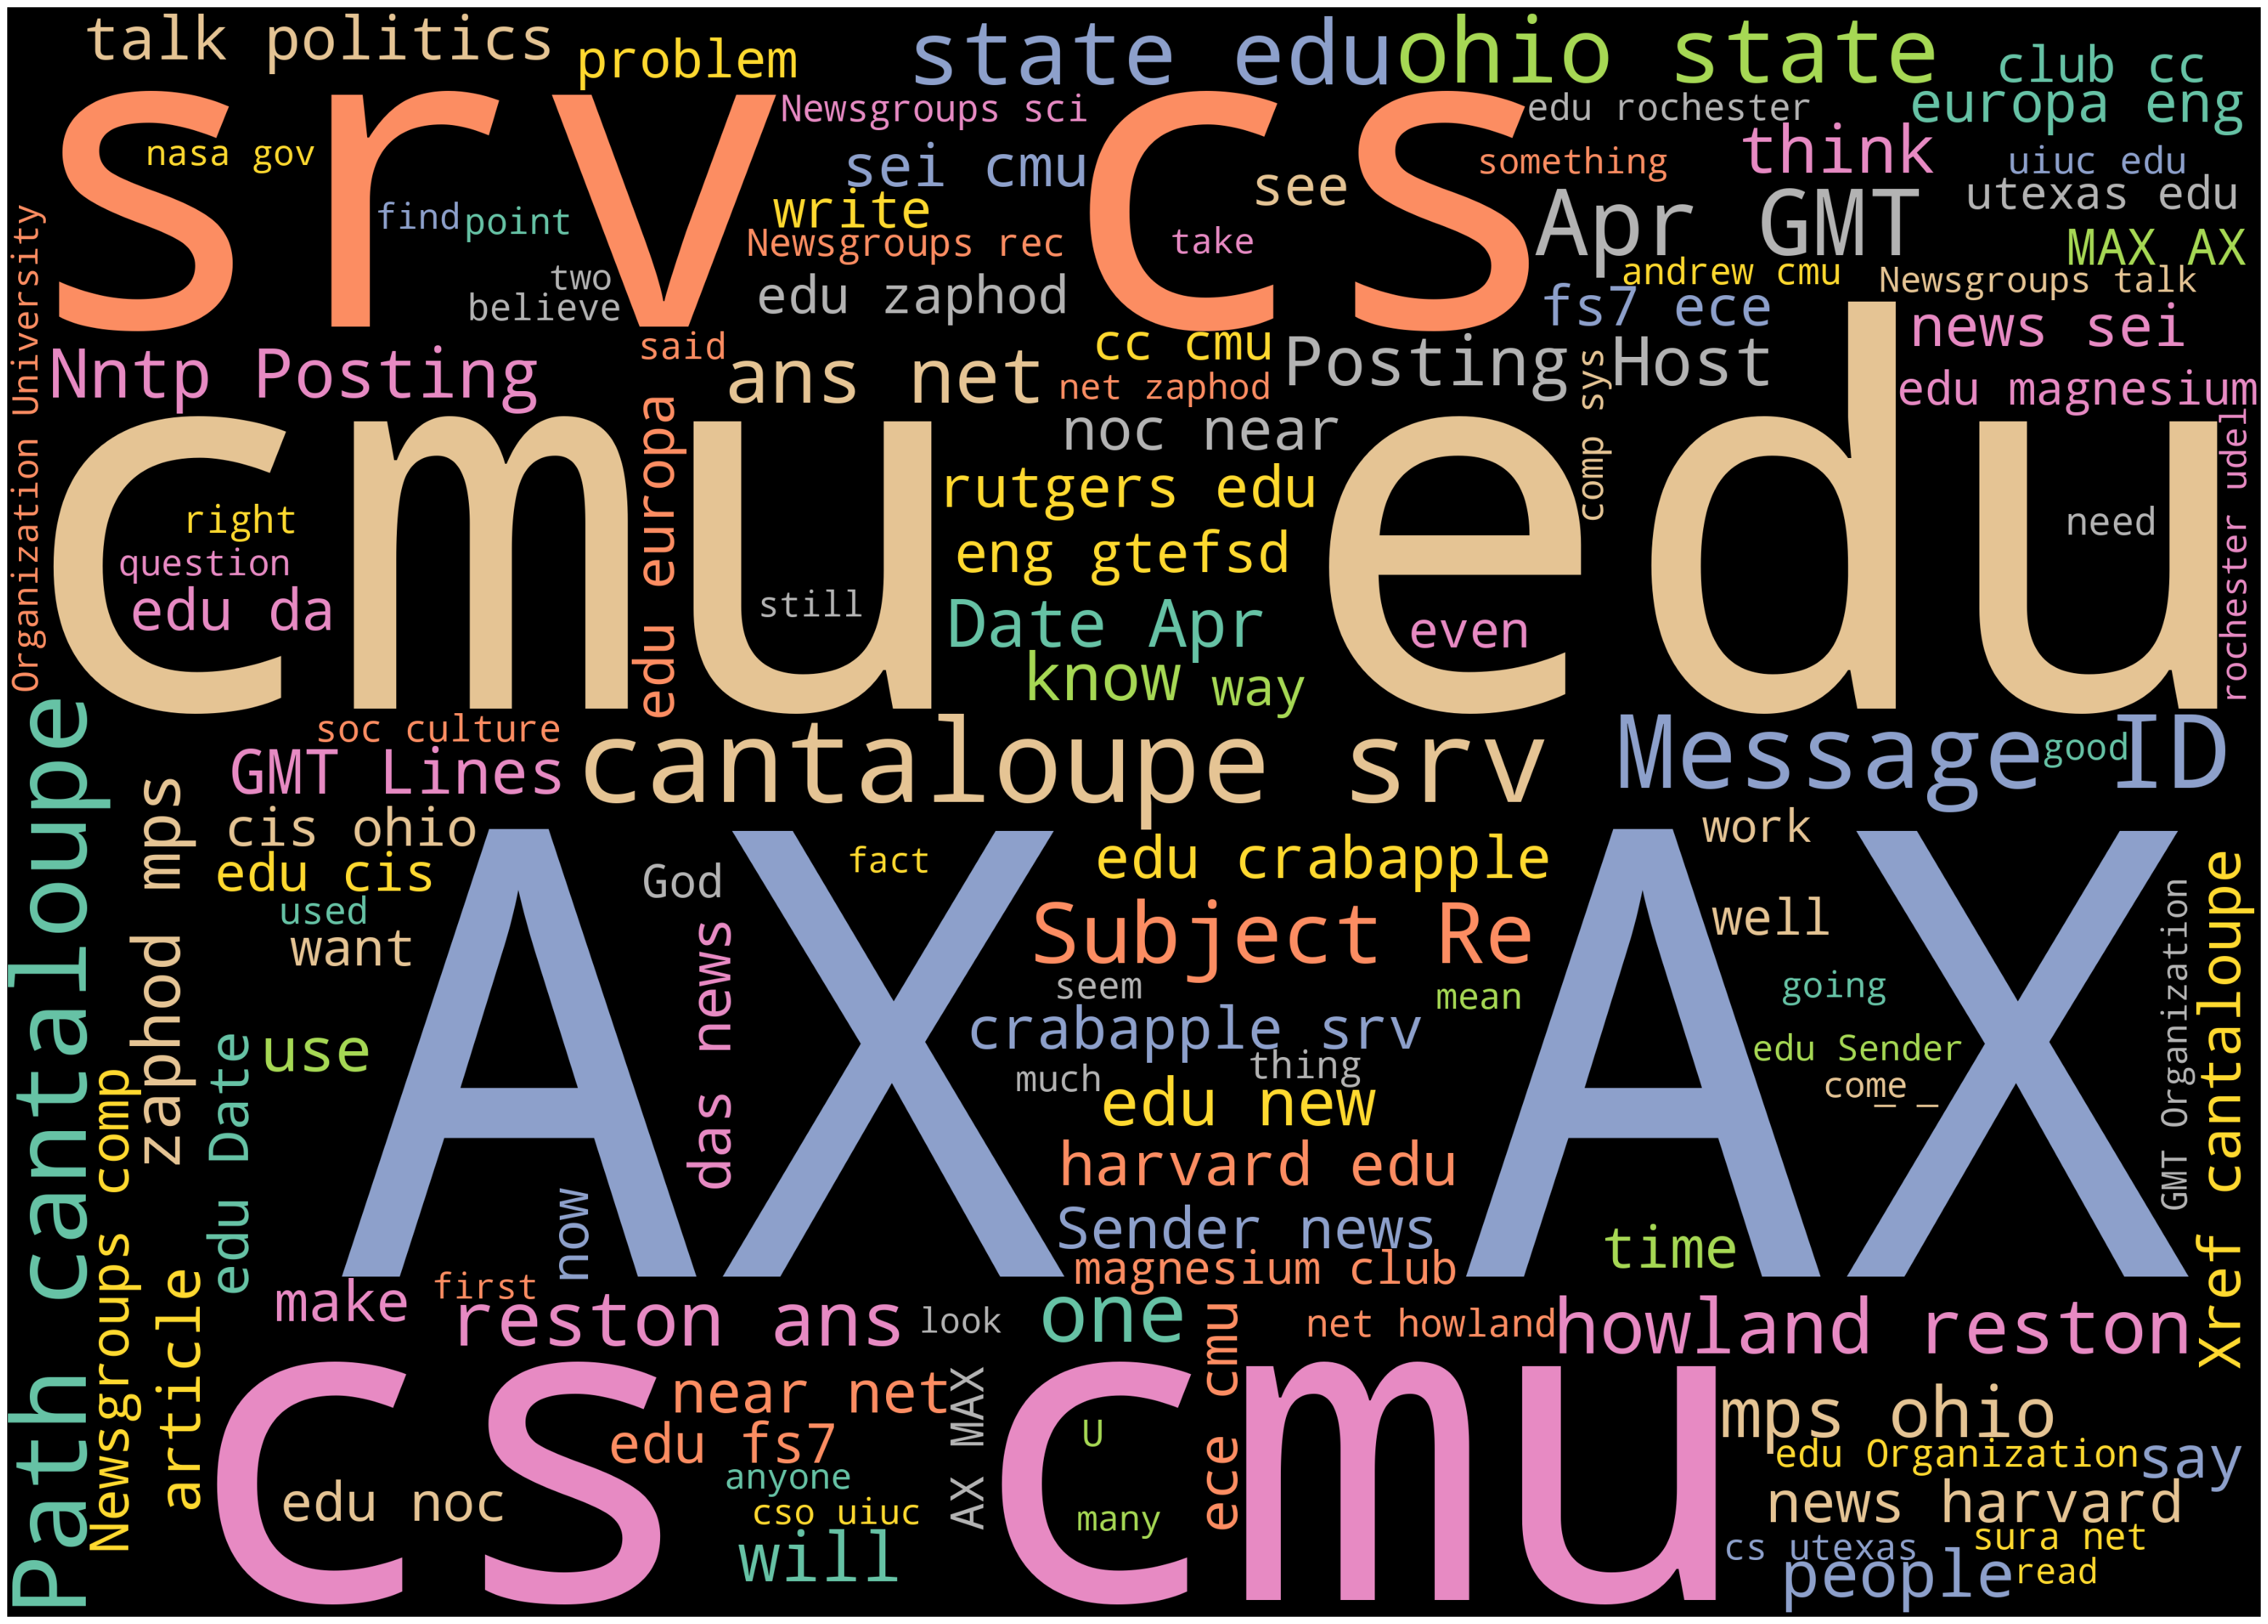

In [ ]:
# Generate wordcloud
wordcloud = WordCloud(width = 3500,
                      height = 2500,
                      background_color='black',
                      max_words=120,
                      colormap='Set2').generate(text)
# Plot
plot_cloud(wordcloud)

# **NAME ENTITY RECOGNITION**

In [ ]:
blog=pd.read_csv('blogs_categories.csv',on_bad_lines = "skip")

In [ ]:
blog = [Data.strip() for Data in blog.Data] # remove both the leading and the trailing characters
blog = [Data for Data in blog if Data] # removes empty strings, because they are considered in Python as False
blog[0:10]

['Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49960 alt.atheism.moderated:713 news.answers:7054 alt.answers:126\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew\nFrom: mathew <mathew@mantis.co.uk>\nNewsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers\nSubject: Alt.Atheism FAQ: Atheist Resources\nSummary: Books, addresses, music -- anything related to atheism\nKeywords: FAQ, atheism, books, music, fiction, addresses, contacts\nMessage-ID: <19930329115719@mantis.co.uk>\nDate: Mon, 29 Mar 1993 11:57:19 GMT\nExpires: Thu, 29 Apr 1993 11:57:19 GMT\nFollowup-To: alt.atheism\nDistribution: world\nOrganization: Mantis Consultants, Cambridge. UK.\nApproved: news-answers-request@mit.edu\nSupersedes: <19930301143317@mantis.co.uk>\nLines: 290\n\nArchive-name: atheism/resources\nAlt-atheism-archive-name: resources\nLast-

In [ ]:
##Part Of Speech Tagging
nlp = spacy.load("en_core_web_sm")

one_block = blog[2]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [ ]:
for token in doc_block[0:20]:
    print(token, token.pos_)

Newsgroups NOUN
: PUNCT
alt.atheism X

 SPACE
Path NOUN
: PUNCT
cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!fs7.ece.cmu.edu!europa.eng.gtefsd.com!howland.reston.ans.net!usc!sdd.hp.com!nigel.msen.com!yale.edu!ira.uka.de!news.dfn.de!tubsibr!dbstu1.rz.tu PROPN
- PUNCT
bs.de!I3150101 NUM

 SPACE
From ADP
: PUNCT
I3150101@dbstu1.rz.tu-bs.de NOUN
( PUNCT
Benedikt PROPN
Rosenau PROPN
) PUNCT

 SPACE
Subject NOUN
: PUNCT


In [ ]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['65974@mimsy.umd.edu', 'Apr', 'Lines', 'article', 'writes', 'has', 'elaborated', 'theology', 'is', 'evidence', 'known', 'content', 'known', 'canonized', 'form', 'argument', 'elaborate', 'argument', 'goes', 'follows']


In [ ]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df

word  count
0     evidence      4
1        point      4
2        known      3
3     argument      3
4    knowledge      3
..         ...    ...
149       look      1
150  arguments      1
151      based      1
152  connected      1
153   redating      1

[154 rows x 2 columns]

<Axes: title={'center': 'Top verbs and nouns'}, xlabel='word'>

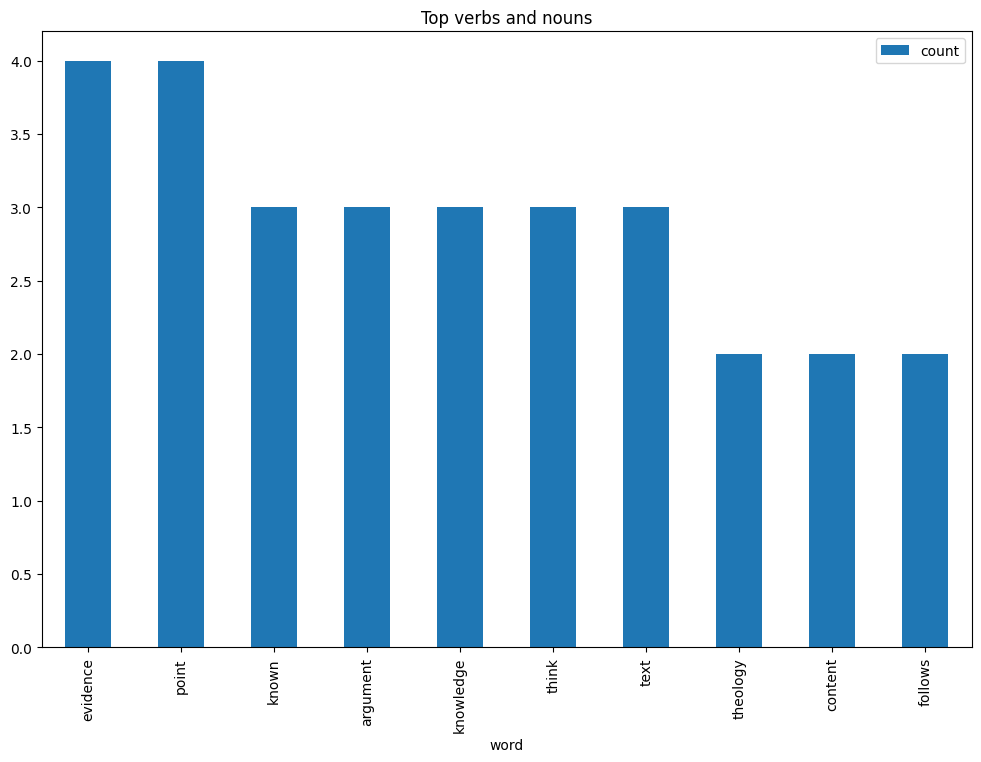

In [ ]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

# **Emotion Mining**

In [127]:
#Sentiment analysis
blog = pd.read_csv('blogs_categories.csv', sep=',', encoding='latin-1')
blog.shape

(19997, 3)

In [128]:
blog

Unnamed: 0                                               Data  \
0               0  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...   
1               1  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...   
2               2  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
3               3  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...   
4               4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...   
...           ...                                                ...   
19992       19992  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...   
19993       19993  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...   
19994       19994  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....   
19995       19995  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....   
19996       19996  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...   

                   Labels  
0             alt.atheism  
1             alt.atheism  
2             alt.atheism  
3             alt.atheism  
4             alt.atheism  
...                   ...  
19992  talk.religion.misc  
19993  talk.religion.misc  
19994  talk.religion.misc  
19995  talk.religion.misc  
19996  talk.religion.misc  

[19997 rows x 3 columns]

In [129]:
blog=pd.read_csv('blogs_categories.csv',on_bad_lines = "skip")

In [130]:
blog.drop(['Unnamed: 0','Labels'],axis=1,inplace=True)

In [131]:
blog

Data
0      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...
1      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...
2      Newsgroups: alt.atheism\nPath: cantaloupe.srv....
3      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...
4      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...
...                                                  ...
19992  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...
19993  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...
19994  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....
19995  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....
19996  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...

[19997 rows x 1 columns]

In [135]:
blog = [Data.strip() for Data in blog.Data] # remove both the leading and the trailing spaces
blog = [Data for Data in blog if Data] # removes empty strings, because they are considered in Python as False
blog

['Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49960 alt.atheism.moderated:713 news.answers:7054 alt.answers:126\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew\nFrom: mathew <mathew@mantis.co.uk>\nNewsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers\nSubject: Alt.Atheism FAQ: Atheist Resources\nSummary: Books, addresses, music -- anything related to atheism\nKeywords: FAQ, atheism, books, music, fiction, addresses, contacts\nMessage-ID: <19930329115719@mantis.co.uk>\nDate: Mon, 29 Mar 1993 11:57:19 GMT\nExpires: Thu, 29 Apr 1993 11:57:19 GMT\nFollowup-To: alt.atheism\nDistribution: world\nOrganization: Mantis Consultants, Cambridge. UK.\nApproved: news-answers-request@mit.edu\nSupersedes: <19930301143317@mantis.co.uk>\nLines: 290\n\nArchive-name: atheism/resources\nAlt-atheism-archive-name: resources\nLast-

In [132]:
example=blog['Data'][150]
print(example)

Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!fs7.ece.cmu.edu!europa.eng.gtefsd.com!howland.reston.ans.net!wupost!uunet!haven.umd.edu!mimsy!mangoe
From: mangoe@cs.umd.edu (Charley Wingate)
Newsgroups: alt.atheism
Subject: Re: Gospel Dating
Message-ID: <66015@mimsy.umd.edu>
Date: 6 Apr 93 10:48:01 GMT
References: <kmr4.1406.733939189@po.CWRU.edu>
Sender: news@mimsy.umd.edu
Lines: 48

>So then, you require the same amount of evidence to believe that I 
>a) own a pair of bluejeans and b) have superhuman powers?

Well, I could use the argument that some here use about "nature" and claim
that you cannot have superhuman powers because you are a human; superhuman
powers are beyond what a human has, and since you are a human, any powers
you have are not beyond those of a human.  Hence, you cannot have superhuman
powers.  Sound good to you?

Anyway, to the evidence question: it depends on the context.  In this group,
since you are posting from a american college site, I'm willing to 

In [145]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(blog))
sentences[5:50]

['Telephone: (608) 256-8900\n\nEVOLUTION DESIGNS\n\nEvolution Designs sell the "Darwin fish".',
 'It\'s a fish symbol, like the ones\nChristians stick on their cars, but with feet and the word "Darwin" written\ninside.',
 'The deluxe moulded 3D plastic fish is $4.95 postpaid in the US.',
 'Write to:  Evolution Designs, 7119 Laurel Canyon #4, North Hollywood,\n           CA 91605.',
 'People in the San Francisco Bay area can get Darwin Fish from Lynn Gold --\ntry mailing <figmo@netcom.com>.',
 'For net people who go to Lynn directly, the\nprice is $4.95 per fish.',
 'AMERICAN ATHEIST PRESS\n\nAAP publish various atheist books -- critiques of the Bible, lists of\nBiblical contradictions, and so on.',
 'One such book is:\n\n"The Bible Handbook" by W.P.',
 'Ball and G.W.',
 'Foote.',
 'American Atheist Press.',
 '372 pp.',
 'ISBN 0-910309-26-4, 2nd edition, 1986.',
 'Bible contradictions,\nabsurdities, atrocities, immoralities... contains Ball, Foote: "The Bible\nContradicts Itself", AAP.'

In [181]:
sent_df = pd.DataFrame(blog,columns=['sentence'])
sent_df

sentence
0      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...
1      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...
2      Newsgroups: alt.atheism\nPath: cantaloupe.srv....
3      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...
4      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...
...                                                  ...
19992  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...
19993  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...
19994  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....
19995  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....
19996  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...

[19997 rows x 1 columns]

In [183]:
from textblob import TextBlob

In [184]:
sent_df['sentiment']=sent_df['sentence'].apply(lambda x : TextBlob(x).sentiment.polarity)

sent_df

sentence  sentiment
0      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...   0.055283
1      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...   0.091350
2      Newsgroups: alt.atheism\nPath: cantaloupe.srv....   0.032013
3      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...   0.005766
4      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  -0.087500
...                                                  ...        ...
19992  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...   0.229470
19993  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...   0.062130
19994  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....   0.072549
19995  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....   0.104136
19996  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  -0.013889

[19997 rows x 2 columns]

In [185]:
def assign_Result(ratings):
    if ratings < 0:
        result = 'negative'
    elif ratings >= 0:
        result = 'positive'

    return result

In [186]:
sent_df['review_segment']=sent_df['sentiment'].apply(assign_Result)

sent_df

sentence  sentiment  \
0      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...   0.055283   
1      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...   0.091350   
2      Newsgroups: alt.atheism\nPath: cantaloupe.srv....   0.032013   
3      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...   0.005766   
4      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  -0.087500   
...                                                  ...        ...   
19992  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...   0.229470   
19993  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...   0.062130   
19994  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....   0.072549   
19995  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....   0.104136   
19996  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  -0.013889   

      review_segment  
0           positive  
1           positive  
2           positive  
3           positive  
4           negative  
...              ...  
19992       positive  
19993       positive  
19994       positive  
19995       positive  
19996       negative  

[19997 rows x 3 columns]

<Axes: xlabel='review_segment'>

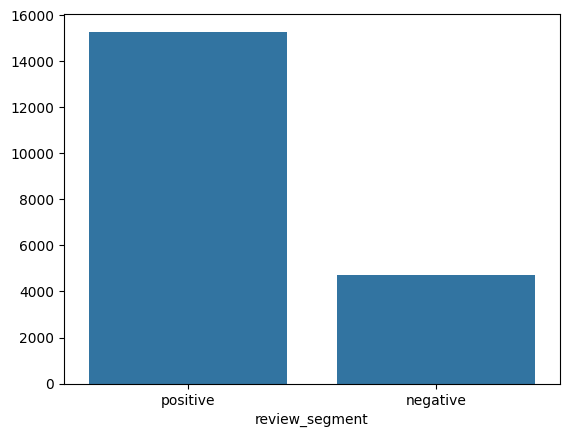

In [198]:
sns.barplot(x=sent_df['review_segment'].value_counts().index, y=sent_df['review_segment'].value_counts().values)

<Axes: ylabel='count'>

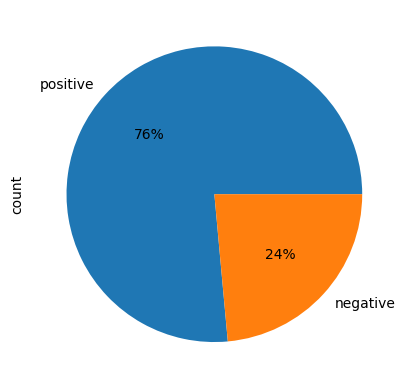

In [199]:
sent_df['review_segment'].value_counts().plot(kind='pie',autopct='%1.00f%%')

In [204]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)
sent_df

sentence  sentiment  \
0      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...   0.055283   
1      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...   0.091350   
2      Newsgroups: alt.atheism\nPath: cantaloupe.srv....   0.032013   
3      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...   0.005766   
4      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  -0.087500   
...                                                  ...        ...   
19992  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...   0.229470   
19993  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...   0.062130   
19994  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....   0.072549   
19995  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....   0.104136   
19996  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  -0.013889   

      review_segment  word_count  
0           positive        1726  
1           positive        5248  
2           positive         738  
3           positive         277  
4           negative         133  
...              ...         ...  
19992       positive         195  
19993       positive         239  
19994       positive         203  
19995       positive         356  
19996       negative         163  

[19997 rows x 4 columns]

In [206]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment']<=0].head()

sentence  sentiment  \
4   Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  -0.087500   
6   Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....  -0.055556   
7   Newsgroups: alt.atheism\nPath: cantaloupe.srv....  -0.113690   
12  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  -0.033333   
14  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....  -0.003513   

   review_segment  word_count  
4        negative         133  
6        negative         102  
7        negative         269  
12       negative         143  
14       negative         417

In [209]:
sent_df[sent_df['sentiment']<-1]

Empty DataFrame
Columns: [sentence, sentiment, review_segment, word_count]
Index: []

<Axes: xlabel='sentiment', ylabel='Density'>

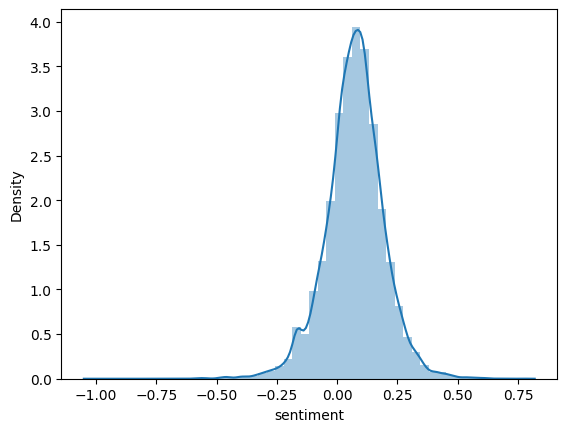

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment'])

# **NAIVE BAYES**

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [202]:
#df=pd.DataFrame(tfidf_vectorizer.get_feature_names_out())
#df

0
0        00
1        01
2        02
3        03
4        04
..      ...
495     yes
496     yet
497     you
498    your
499  zaphod

[500 rows x 1 columns]

In [218]:
from google.colab import files
uploaded=files.upload()

Saving blogs_1.csv to blogs_1 (1).csv


In [219]:
ctg=pd.read_csv('blogs_1.csv')

In [220]:
ctg

Unnamed: 0                                               Data  \
0             0  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...   
1             1  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...   
2             2  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
3             3  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...   
4             4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...   
..          ...                                                ...   
666         666  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
667         667  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   
668         668  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   
669         669  Xref: cantaloupe.srv.cs.cmu.edu soc.culture.ar...   
670         670  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   

          Labels  
0    alt.atheism  
1    alt.atheism  
2    alt.atheism  
3    alt.atheism  
4    alt.atheism  
..           ...  
666  alt.atheism  
667  alt.atheism  
668  alt.atheism  
669  alt.atheism  
670          NaN  

[671 rows x 3 columns]

In [221]:
ctg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  671 non-null    int64 
 1   Data        671 non-null    object
 2   Labels      670 non-null    object
dtypes: int64(1), object(2)
memory usage: 15.9+ KB


In [222]:
ctg.describe()

Unnamed: 0
count  671.000000
mean   335.000000
std    193.845299
min      0.000000
25%    167.500000
50%    335.000000
75%    502.500000
max    670.000000

In [223]:
ctg.isnull().sum()

Unnamed: 0    0
Data          0
Labels        1
dtype: int64

In [226]:
ctg.drop('Unnamed: 0',axis=1,inplace=True)

In [227]:
ctg.dropna()

Data       Labels
0    Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...  alt.atheism
1    Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism
2    Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
3    Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism
4    Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism
..                                                 ...          ...
665  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  alt.atheism
666  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
667  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism
668  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism
669  Xref: cantaloupe.srv.cs.cmu.edu soc.culture.ar...  alt.atheism

[670 rows x 2 columns]

In [257]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(ctg)

feature_names = vectorizer.get_feature_names_out()
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

In [258]:
df_tfidf

data  labels
0   1.0     0.0
1   0.0     1.0

In [240]:
X_train = df_tfidf.drop('labels',axis=1)
y_train = df_tfidf[['labels']]
X_test = df_tfidf.drop('labels',axis=1)
y_test = df_tfidf[['labels']]

In [241]:
print("Shape of X_train :",X_train.shape)
print("Shape of X_test  :",X_test.shape)
print("Shape of y_train :",y_train.shape)
print("Shape of y_test  :",y_test.shape)

Shape of X_train : (2, 1)
Shape of X_test  : (2, 1)
Shape of y_train : (2, 1)
Shape of y_test  : (2, 1)


In [242]:
# training the model on training set
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [243]:
y_pred_train = gnb.predict(X_train)
y_pred_train

array([0., 1.])

In [245]:
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_train, y_pred_train))
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_train, y_pred_train)*100)

Gaussian Naive Bayes model accuracy(in %): 1.0
Gaussian Naive Bayes model accuracy(in %): 100.0


In [248]:
cm=confusion_matrix(y_train, y_pred_train)
cm

array([[1, 0],
       [0, 1]])

In [249]:
# making predictions on the testing set
y_pred_test = gnb.predict(X_test)

In [250]:
y_pred_test

array([0., 1.])

In [252]:
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_test)*100)

Gaussian Naive Bayes model accuracy(in %): 100.0


In [254]:
cm=confusion_matrix(y_test, y_pred_test)
cm

array([[1, 0],
       [0, 1]])